In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [228]:
df=pd.read_csv('miami1.csv')
df1=pd.read_csv('miami.csv')
df2=pd.read_csv('Key_bisyacne.csv')
df3=pd.read_csv('brickel.csv')
df4=pd.read_csv('Data.csv')
lat_long=pd.read_csv('miami_lat_long_geocod.csv')

In [93]:
df.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,CITY,SUBDIV,LOT SIZE,TOT SQFT,LIV SQFT,YEAR BUILT,CONST,DESIGN1,DESIGN2,HEAT,COOLING,GAR SPACES,PARKING,GAR DESC,DINING,EXT FEAT,FLOORS,INT FEAT,LOT DESC,POOL2,POOL DIM,ROOF,OTHER ROOM,SEWER,VIEW,WATER,WINDOWS,SUBD INFO,EST TAXES,SPA,POOL1,MSTR BATH,STYLE,SHORT SALE,REO,BLDG UNITS,COMPLEX UNITS,UNIT FLOOR LOC,TOTAL FLOORS,SUBDIVISION INFO,SECURITY INFO,RESTRICTIONS,FEE DESCRIPTION,ASSOC FEE PAID PER,MAINT CHARGE,LAND LEASE,REC LEASE,ASSOCIATION FEE,MIN LEASE,MAINT INCL,DEVELOPMENT NAME,COMPLEX,UNIT #,ROOF.1,PUBLIC REMARKS,EXPECTED CLOSING DATE,APPROX LOT SIZE,ZIP CODE,PHOTO COUNT,WITHDRAWN DATE,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,A10738929,Active,5980 N Bay Rd,6,9,2.0,32500000,NaN,09/18/2019 12:00:00 AM,NaN,Miami Beach,LA GORCE GOLF SUB,43615.0,15040.0,11690.0,2015,Concrete Block Construction,Detached,"Two Story, Mediterranean",Central Heat,"Central Cooling, Zoned Cooling",4,"Circular Drive, Driveway, Guest Parking, Pavers",Detached,NaN,"Awnings, Barbeque, Built-In Grill, Deck, Fruit...","Other Floors, Wood Floors","First Floor Entry, Built-Ins, Closet Cabinetry...",1 To Less Than 2 Acre Lot,"Auto Pool Clean, Below Ground Pool, Heated",25x60,NaN,"Den/Library/Office, Family Room, Media Room, S...",Municipal Sewer,"Bay, Water View",Municipal Water,NaN,LA GORCE GOLF SUB,188036,NaN,True,NaN,R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,"Bar, Boating",NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Situated behind private Gates is an exceptiona...,NaN,NaN,33140,29.0,NaN,NaN,NaN,NaN,NaN,26,Miami-Dade County,02-32-15-003-0190,09/18/2019 2:00:16 PM,NaN,NaN
1,A10580401,Active,5004 N Bay Rd,8,9,1.0,26500000,NaN,12/03/2018 12:00:00 AM,NaN,Miami Beach,LA GORCE GOLF SUB,21517.0,16655.0,12804.0,2016,"Elevated Construction, New Construction",Detached,Three Or More Stories,"Central Heat, Electric Heat","Central Cooling, Electric Cooling",6,"Covered Parking, Driveway",Detached,"Breakfast Area, Formal Dining, Snack Bar/Counter","Barbeque, Built-In Grill, Exterior Lighting, H...",Other Floors,"First Floor Entry, Bar, Built-Ins, Closet Cabi...",1/4 To Less Than 1/2 Acre Lot,"Equipment Stays, Heated, Pool Bath",27x22,NaN,"Family Room, Separate Guest/In-Law Quarters, M...",Municipal Sewer,"Bay, Water View",Municipal Water,"Blinds/Shades, Drapes & Rods, High Impact Windows",LA GORCE GOLF SUB,256084,True,True,"Bidet, Separate Tub & Shower",R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,Paved Road,NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Bay Road,NaN,NaN,NaN,"BAKARA ""SESTO SENSO""~ULTRA-MODERN BAYFRONT RES...",NaN,.494 acre,33140,51.0,NaN,NaN,NaN,NaN,NaN,315,Miami-Dade County,02-32-15-003-2080,12/06/2018 11:46:48 AM,NaN,NaN
2,A10488686,Active,5565/5589 Pine Tree Dr,10,13,1.0,23990000,NaN,06/30/2018 12:00:00 AM,NaN,Miami Beach,BEACH VIEW SUB,83548.0,14256.0,11356.0,1925,Cbs Construction,Detached,Two Story,"Central Heat, Electric Heat","Central Cooling, Electric Cooling",2,Driveway,Detached,NaN,Patio,"Ceramic Floor, Wood Floors",First Floor Entry,1 To Less Than 2 Acre Lot,Below Ground Pool,2,NaN,"Den/Library/Office, Family Room, Florida Room",Municipal Sewer,"Ocean View, Water View",Municipal Water,Blinds/Shades,BEACH VIEW SUB,153260,False,True,2 Master Bathrooms,R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,No Subdiv/Park Info,NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pine Tree Drive,NaN,NaN,NaN,DEVELOPERS DREAM ~ SUBDIVIDE THIS WATERFRONT 2...,NaN,1.92,33140,11.0,NaN,NaN,NaN,NaN,NaN,471,Miami-Dade County,02-32-14-003-0290,06/30/2018 11:01:03 AM,NaN,NaN
3,A10561804,Active,100 La Gorce Circle,7,9,1.0,22500000,NaN,11/09/2018 12:00:00 AM,NaN,Miami Beach,LA GORCE ISLAND,77748.0,12687.0,10094.0,1952,Cbs Construction,Detached,"Two Story, Substantially Remodeled",Central Heat,"Central Cooling, Electr

In [94]:
df1.head()

,Unnamed: 0,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,CITY,SUBDIV,LOT SIZE,TOT SQFT,LIV SQFT,YEAR BUILT,CONST,DESIGN1,DESIGN2,HEAT,COOLING,GAR SPACES,PARKING,GAR DESC,DINING,EXT FEAT,FLOORS,INT FEAT,LOT DESC,POOL2,POOL DIM,ROOF,OTHER ROOM,SEWER,VIEW,WATER,WINDOWS,SUBD INFO,EST TAXES,SPA,POOL1,MSTR BATH,STYLE,SHORT SALE,REO,BLDG UNITS,COMPLEX UNITS,UNIT FLOOR LOC,TOTAL FLOORS,SUBDIVISION INFO,SECURITY INFO,RESTRICTIONS,FEE DESCRIPTION,ASSOC FEE PAID PER,MAINT CHARGE,LAND LEASE,REC LEASE,ASSOCIATION FEE,MIN LEASE,MAINT INCL,DEVELOPMENT NAME,COMPLEX,UNIT #,ROOF.1,PUBLIC REMARKS,EXPECTED CLOSING DATE,APPROX LOT SIZE,ZIP CODE,PHOTO COUNT,WITHDRAWN DATE,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,0,A10738929,Active,5980 N Bay Rd,6,9,2.0,32500000,NaN,09/18/2019 12:00:00 AM,NaN,Miami Beach,LA GORCE GOLF SUB,43615.0,15040.0,11690.0,2015,Concrete Block Construction,Detached,"Two Story, Mediterranean",Central Heat,"Central Cooling, Zoned Cooling",4,"Circular Drive, Driveway, Guest Parking, Pavers",Detached,NaN,"Awnings, Barbeque, Built-In Grill, Deck, Fruit...","Other Floors, Wood Floors","First Floor Entry, Built-Ins, Closet Cabinetry...",1 To Less Than 2 Acre Lot,"Auto Pool Clean, Below Ground Pool, Heated",25x60,NaN,"Den/Library/Office, Family Room, Media Room, S...",Municipal Sewer,"Bay, Water View",Municipal Water,NaN,LA GORCE GOLF SUB,188036,NaN,True,NaN,R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,"Bar, Boating",NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Situated behind private Gates is an exceptiona...,NaN,NaN,33140,29.0,NaN,NaN,NaN,NaN,NaN,26,Miami-Dade County,02-32-15-003-0190,09/18/2019 2:00:16 PM,NaN,NaN
1,1,A10580401,Active,5004 N Bay Rd,8,9,1.0,26500000,NaN,12/03/2018 12:00:00 AM,NaN,Miami Beach,LA GORCE GOLF SUB,21517.0,16655.0,12804.0,2016,"Elevated Construction, New Construction",Detached,Three Or More Stories,"Central Heat, Electric Heat","Central Cooling, Electric Cooling",6,"Covered Parking, Driveway",Detached,"Breakfast Area, Formal Dining, Snack Bar/Counter","Barbeque, Built-In Grill, Exterior Lighting, H...",Other Floors,"First Floor Entry, Bar, Built-Ins, Closet Cabi...",1/4 To Less Than 1/2 Acre Lot,"Equipment Stays, Heated, Pool Bath",27x22,NaN,"Family Room, Separate Guest/In-Law Quarters, M...",Municipal Sewer,"Bay, Water View",Municipal Water,"Blinds/Shades, Drapes & Rods, High Impact Windows",LA GORCE GOLF SUB,256084,True,True,"Bidet, Separate Tub & Shower",R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,Paved Road,NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Bay Road,NaN,NaN,NaN,"BAKARA ""SESTO SENSO""~ULTRA-MODERN BAYFRONT RES...",NaN,.494 acre,33140,51.0,NaN,NaN,NaN,NaN,NaN,315,Miami-Dade County,02-32-15-003-2080,12/06/2018 11:46:48 AM,NaN,NaN
2,2,A10488686,Active,5565/5589 Pine Tree Dr,10,13,1.0,23990000,NaN,06/30/2018 12:00:00 AM,NaN,Miami Beach,BEACH VIEW SUB,83548.0,14256.0,11356.0,1925,Cbs Construction,Detached,Two Story,"Central Heat, Electric Heat","Central Cooling, Electric Cooling",2,Driveway,Detached,NaN,Patio,"Ceramic Floor, Wood Floors",First Floor Entry,1 To Less Than 2 Acre Lot,Below Ground Pool,2,NaN,"Den/Library/Office, Family Room, Florida Room",Municipal Sewer,"Ocean View, Water View",Municipal Water,Blinds/Shades,BEACH VIEW SUB,153260,False,True,2 Master Bathrooms,R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,No Subdiv/Park Info,NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pine Tree Drive,NaN,NaN,NaN,DEVELOPERS DREAM ~ SUBDIVIDE THIS WATERFRONT 2...,NaN,1.92,33140,11.0,NaN,NaN,NaN,NaN,NaN,471,Miami-Dade County,02-32-14-003-0290,06/30/2018 11:01:03 AM,NaN,NaN
3,3,A10561804,Active,100 La Gorce Circle,7,9,1.0,22500000,NaN,11/09/2018 12:00:00 AM,NaN,Miami Beach,LA GORCE ISLAND,77748.0,12687.0,10094.0,1952,Cbs Construction,Detached,"Two Story, Substantially Remodeled",Central Heat,"Cent

In [95]:
df2.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,CITY,SUBDIV,LOT SIZE,TOT SQFT,LIV SQFT,YEAR BUILT,CONST,DESIGN1,DESIGN2,HEAT,COOLING,GAR SPACES,PARKING,GAR DESC,DINING,EXT FEAT,FLOORS,INT FEAT,LOT DESC,POOL2,POOL DIM,ROOF,OTHER ROOM,SEWER,VIEW,WATER,WINDOWS,SUBD INFO,EST TAXES,SPA,POOL1,MSTR BATH,STYLE,SHORT SALE,REO,BLDG UNITS,COMPLEX UNITS,UNIT FLOOR LOC,TOTAL FLOORS,SUBDIVISION INFO,SECURITY INFO,RESTRICTIONS,FEE DESCRIPTION,ASSOC FEE PAID PER,MAINT CHARGE,LAND LEASE,REC LEASE,ASSOCIATION FEE,MIN LEASE,MAINT INCL,DEVELOPMENT NAME,COMPLEX,UNIT #,ROOF.1,PUBLIC REMARKS,EXPECTED CLOSING DATE,APPROX LOT SIZE,ZIP CODE,PHOTO COUNT,WITHDRAWN DATE,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,A10626407,Active,28 Harbor Pt,7,8,1.0,25000000,NaN,02/25/2019 12:00:00 AM,NaN,Key Biscayne,LORIDO ESTATES,27137.0,11556.0,11556.0,2019,"Cbs Construction, New Construction, Slab Const...",Detached,Two Story,"Central Heat, Electric Heat","Central Cooling, Electric Cooling",4,"Circular Drive, Driveway, Pavers",Attached,"Breakfast Area, Dining/Living Room, Formal Dining","Deck, Exterior Lighting, High Impact Doors, Op...",Tile Floors,"First Floor Entry, Cooking Island, Foyer Entry...",1/2 To Less Than 3/4 Acre Lot,"Below Ground Pool, Heated, Whirlpool In Pool",40X15,NaN,"Den/Library/Office, Family Room, Great Room, M...",Municipal Sewer,Direct Ocean,Municipal Water,"High Impact Windows, Impact Glass, Sliding",LORIDO ESTATES,67895,True,True,"Dual Sinks, Separate Tub & Shower",R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,No Subdiv/Park Info,NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 Harbor is a spectacular oceanfront sanctuar...,NaN,NaN,33149,59.0,NaN,NaN,NaN,NaN,NaN,231,Miami-Dade County,24-52-06-001-0020,02/25/2019 1:40:27 PM,NaN,NaN
1,A10728109,Active,9 Harbor Pt,8,8,3.0,19500000,NaN,08/22/2019 12:00:00 AM,NaN,Key Biscayne,MATHESON ESTATES,27300.0,13502.0,11028.0,2006,Cbs Construction,Detached,"Two Story, Tri Level","Central Heat, Electric Heat, Zoned Heat","Central Cooling, Electric Cooling, Zoned Cooling",4,"Circular Drive, Covered Parking, Driveway",NaN,"Breakfast Area, Eat-In Kitchen, Formal Dining","Exterior Lighting, Extra Building/Shed, High I...","Marble Floors, Terrazzo Floors, Wood Floors","First Floor Entry, Bar, Built-Ins, Cooking Isl...",1/2 To Less Than 3/4 Acre Lot,Below Ground Pool,0x0,NaN,"Den/Library/Office, Family Room, Florida Room,...",Municipal Sewer,"Bay, Ocean View",Municipal Water,Impact Glass,MATHESON ESTATES,221372,NaN,True,"2 Master Bathrooms, Bidet, Separate Tub & Shower",R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,No Subdiv/Park Info,NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to one of the most refined waterfront ...,NaN,27300,33149,33.0,NaN,NaN,NaN,NaN,NaN,53,Miami-Dade County,24-42-32-002-0282,08/22/2019 4:25:08 PM,NaN,NaN
2,A10643662,Active,430 N Mashta Dr,6,7,1.0,19500000,NaN,03/22/2019 12:00:00 AM,NaN,Key Biscayne,SMUGGLERS COVE,36069.0,6000.0,6000.0,2015,Cbs Construction,Attached,"Two Story, Split Level","Central Heat, Electric Heat","Ceiling Fans, Electric Cooling",4,"Covered Parking, Driveway, Golf Cart Parking",Attached,"Breakfast Area, Dining/Living Room, Florida/Di...","Deck, Extra Building/Shed, Fence, High Impact ...","Marble Floors, Wood Floors","First Floor Entry, Built-Ins, Closet Cabinetry...",1/2 To Less Than 3/4 Acre Lot,Below Ground Pool,1x1,NaN,"Family Room, Media Room",Municipal Sewer,"Garden View, River",Municipal Water,NaN,SMUGGLERS COVE,75671,True,True,"Bidet, Dual Sinks, Separate Tub & Shower, Whir...",R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,No Subdiv/Park Info,NaN,No Restrictions,NaN,Yearly,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"One of kind waterfront property,House sits in ...",NaN,36069,33149,32.0,NaN,NaN,NaN,NaN,NaN,206,Miami-Dade County,24-52-05-017-0050,03/22/

In [96]:
df3.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,CITY,SUBDIV,LOT SIZE,TOT SQFT,LIV SQFT,YEAR BUILT,CONST,DESIGN1,DESIGN2,HEAT,COOLING,GAR SPACES,PARKING,GAR DESC,DINING,EXT FEAT,FLOORS,INT FEAT,LOT DESC,POOL2,POOL DIM,ROOF,OTHER ROOM,SEWER,VIEW,WATER,WINDOWS,SUBD INFO,EST TAXES,SPA,POOL1,MSTR BATH,STYLE,SHORT SALE,REO,BLDG UNITS,COMPLEX UNITS,UNIT FLOOR LOC,TOTAL FLOORS,SUBDIVISION INFO,SECURITY INFO,RESTRICTIONS,FEE DESCRIPTION,ASSOC FEE PAID PER,MAINT CHARGE,LAND LEASE,REC LEASE,ASSOCIATION FEE,MIN LEASE,MAINT INCL,DEVELOPMENT NAME,COMPLEX,UNIT #,ROOF.1,PUBLIC REMARKS,EXPECTED CLOSING DATE,APPROX LOT SIZE,ZIP CODE,PHOTO COUNT,WITHDRAWN DATE,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,R10532890,Active,1435 Brickell Avenue,3,3,1.0,1395000,NaN,05/22/2019 12:00:00 AM,NaN,Miami,FOUR SEASONS CONDO HOTEL,NaN,2371.0,2371.0,2003,Concrete Block Construction,NaN,NaN,Central Heat,Central Cooling,2,"2 Or More Spaces, Assigned Parking, Covered Pa...",NaN,"Breakfast Area, Family/Dining Combination",NaN,"Carpeted Floors, Marble Floors","Built-Ins, Closet Cabinetry, Elevator, Foyer E...",East Of Us 1,NaN,NaN,NaN,"Laundry, Sauna, Storage Room",NaN,"Bay, Other View, Water View",NaN,"Drapes & Rods, Impact Glass",FOUR SEASONS CONDO HOTEL,18614,NaN,False,"2 Master Bathrooms, Bidet, Combination Tub & S...",C43-Condo-Hotel,False,False,85.0,NaN,30.0,70.0,"Community Pool, Exercise Room, Game Room, Side...",Doorman,"Daily Rentals Ok, Ok To Lease",NaN,Monthly,NaN,0.0,NaN,3115.0,NaN,"Recreation Facilities, Security, Garbage And T...",NaN,FOUR SEASONS CONDO HOTEL,"3011,3012",NaN,This beautiful condo residence at the Four Sea...,NaN,East of US-1,33131,44,NaN,NaN,NaN,NaN,NaN,145,Miami-Dade County,01-41-39-078-0780,05/23/2019 12:45:54 PM,NaN,NaN
1,A10753606,Active,167 SW 20th Rd,4,4,0.0,1199000,NaN,10/08/2019 12:00:00 AM,NaN,Miami,HOLLEMAN PARK,13837.0,2468.0,2468.0,1940,Concrete Block Construction,Detached,One Story,Central Heat,"Air Purifier, Central Cooling",2,"Circular Drive, Driveway, Guest Parking",Attached,"Breakfast Area, Dining/Living Room, Formal Dining","Barbeque, Built-In Grill, Deck, Exterior Light...","Marble Floors, Other Floors, Wood Floors","First Floor Entry, Built-Ins, Closet Cabinetry...",1/4 To Less Than 1/2 Acre Lot,"Below Ground Pool, Equipment Stays",20X40,NaN,"Attic, Den/Library/Office, Family Room, Florid...",Municipal Sewer,Garden View,Municipal Water,NaN,HOLLEMAN PARK,8150,NaN,True,"Dual Sinks, Separate Tub & Shower, Whirlpool/Spa",R31-Pool Only,False,False,NaN,NaN,NaN,NaN,"Paved Road, Public Road, Sidewalks",NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This spectacular Mediterranean Villa 4/4 estat...,NaN,13837,33129,65,NaN,NaN,NaN,NaN,NaN,6,Miami-Dade County,01-41-38-001-3670,10/08/2019 9:43:37 PM,NaN,NaN
2,A10726379,Active,1644 S Miami Ave,6,7,NaN,1190000,NaN,08/19/2019 12:00:00 AM,NaN,Miami,RACKLEYS RESUB,7540.0,0.0,0.0,2020,Concrete Block Construction,Attached,Three Or More Stories,Electric Heat,Electric Cooling,8,Covered Parking,Attached,NaN,"Built-In Grill, High Impact Doors, Open Balcon...",Slate Floors,First Floor Entry,Less Than 1/4 Acre Lot,NaN,NaN,NaN,"Family Room, Florida Room",Municipal Sewer,Garden View,Municipal Water,NaN,RACKLEYS RESUB,12689,NaN,False,Separate Tub & Shower,R30-No Pool/No Water,False,False,NaN,NaN,NaN,NaN,Additional Amenities,NaN,"No Leasing, Other Restrictions",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Vacant Lot For Sale, Price set for the vacant ...",NaN,8500,33129,12,NaN,NaN,NaN,NaN,NaN,56,Miami-Dade County,01-41-39-012-0010,08/19/2019 11:56:03 PM,NaN,NaN
3,A10359452,Active,1435 Brickell Ave,2,2,1.0,1180000,NaN,09/18/2017 12:00:00 AM,NaN,Miami,MILLENNIUM TOWER CONDOMIN,NaN,1747.0,1747.0,2003,Elevated Construction,NaN,NaN,Central Heat,Central Cooling,1,1 Space,NaN,NaN,Other,Ceramic Floor,Walk-In Closets,NaN,NaN,NaN,NaN,NaN,NaN,N

In [97]:
df4.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,CITY,SUBDIV,LOT SIZE,TOT SQFT,LIV SQFT,YEAR BUILT,CONST,DESIGN1,DESIGN2,HEAT,COOLING,GAR SPACES,PARKING,GAR DESC,DINING,EXT FEAT,FLOORS,INT FEAT,LOT DESC,POOL2,POOL DIM,ROOF,OTHER ROOM,SEWER,VIEW,WATER,WINDOWS,SUBD INFO,EST TAXES,SPA,POOL1,MSTR BATH,STYLE,SHORT SALE,REO,BLDG UNITS,COMPLEX UNITS,UNIT FLOOR LOC,TOTAL FLOORS,SUBDIVISION INFO,SECURITY INFO,RESTRICTIONS,FEE DESCRIPTION,ASSOC FEE PAID PER,MAINT CHARGE,LAND LEASE,REC LEASE,ASSOCIATION FEE,MIN LEASE,MAINT INCL,DEVELOPMENT NAME,COMPLEX,UNIT #,ROOF.1,PUBLIC REMARKS,EXPECTED CLOSING DATE,APPROX LOT SIZE,ZIP CODE,PHOTO COUNT,WITHDRAWN DATE,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,A10597515,Active,46 Star Island Dr,10,10,2.0,39950000,NaN,01/10/2019 12:00:00 AM,NaN,Miami Beach,STAR ISLAND,61301.0,18356.0,18356.0,1923,Cbs Construction,Detached,"Two Story, Substantially Remodeled","Central Heat, Electric Heat","Central Cooling, Electric Cooling, Zoned Cooling",6,"Covered Parking, Driveway",Detached,"Breakfast Area, Formal Dining, Snack Bar/Counter","Deck, Exterior Lighting, Fence, High Impact Do...","Marble Floors, Wood Floors","First Floor Entry, Built-Ins, Closet Cabinetry...",1 To Less Than 2 Acre Lot,"Below Ground Pool, Equipment Stays",1,NaN,"Den/Library/Office, Family Room, Florida Room,...",Municipal Sewer,"Bay, Water View",Municipal Water,"Blinds/Shades, Drapes & Rods, High Impact Windows",STAR ISLAND,116195,NaN,True,"Bidet, Dual Sinks, Separate Tub & Shower",R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,"Card/Electric Gate, Street Lights, Underground...",NaN,Ok To Lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Star Island,NaN,NaN,NaN,PRESTIGIOUS PALM BEACH ELEGANCE MEETS THE HIP ...,NaN,1.4073,33139,60.0,NaN,NaN,NaN,NaN,NaN,277,Miami-Dade County,02-42-04-001-0410,01/10/2019 2:54:36 PM,NaN,NaN
1,A10743716,Active,2920 N Bay Rd,6,7,1.0,35000000,NaN,09/25/2019 12:00:00 AM,NaN,Miami Beach,AMD PLAT OF SUNSET LAKE S,48875.0,12881.0,9159.0,2013,"Concrete Block Construction, Stone Exterior Co...",Attached,Two Story,"Central Heat, Electric Heat",Central Cooling,3,Driveway,Attached,NaN,"Barbeque, Built-In Grill, Deck, Fruit Trees, O...","Concrete Floors, Wood Floors","First Floor Entry, Built-Ins, Closet Cabinetry...",1 To Less Than 2 Acre Lot,"Below Ground Pool, Heated",64X28,NaN,"Den/Library/Office, Family Room, Great Room, U...",Municipal Sewer,"Bay, Direct Ocean",Municipal Water,NaN,AMD PLAT OF SUNSET LAKE S,301614,True,True,NaN,R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,"Public Road, Sidewalks, Street Lights",NaN,No Restrictions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Modern Balinese Inspired Masterpiece on Lowe...,NaN,NaN,33140,27.0,NaN,NaN,NaN,NaN,NaN,19,Miami-Dade County,02-32-27-008-0420,09/25/2019 11:52:07 AM,NaN,NaN
2,A10643045,Active,1 Star Island Dr,8,7,1.0,32000000,NaN,03/21/2019 12:00:00 AM,NaN,Miami Beach,CORRECTED PL OF STAR ISLA,58332.0,7988.0,7988.0,1940,Cbs Construction,Detached,Two Story,Electric Heat,"Ceiling Fans, Central Cooling",3,"Circular Drive, Driveway",NaN,"Breakfast Area, Eat-In Kitchen, Formal Dining","Barbeque, Built-In Grill, Deck, Open Balcony","Marble Floors, Wood Floors","First Floor Entry, Cooking Island, Fireplace, ...",1 To Less Than 2 Acre Lot,Below Ground Pool,0,NaN,Guest House,Municipal Sewer,"Ocean View, Pool Area View",Municipal Water,NaN,CORRECTED PL OF STAR ISLA,265267,NaN,True,NaN,R35-WF/Pool/Ocean Access,False,False,NaN,NaN,NaN,NaN,"Gate Guarded, Security Patrol",NaN,Ok To Lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An unrivaled residential oasis on famed and ex...,NaN,NaN,33139,19.0,NaN,NaN,NaN,NaN,NaN,207,Miami-Dade County,02-42-04-001-0010,03/21/2019 1:06:57 PM,NaN,NaN
3,A10728350,Active,29 Star Island Dr,6,7,2.0,29000000,NaN,08/23/2019 12:00:00 AM,NaN,Miami Beach,STAR ISLAND,40000.0,10384.0,9935.0,2000,Cbs Cons

In [107]:
frames=[df,df1,df2,df3,df4]
miami= pd.concat(frames)
pd.set_option('display.max_columns',100)
miami.shape

/Users/talalagedeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(8994, 81)

In [108]:
miami.columns

Index(['ADDRESS', 'APN', 'APPROX LOT SIZE', 'ASSOC FEE PAID PER',
       'ASSOCIATION FEE', 'BEDS', 'BLDG UNITS', 'CITY', 'COMPLEX',
       'COMPLEX UNITS', 'CONST', 'CONTRACT', 'COOLING', 'COUNTY',
       'DAYS ON MARKET', 'DESIGN1', 'DESIGN2', 'DEVELOPMENT NAME', 'DINING',
       'ENTRY DATE', 'EST TAXES', 'EXPECTED CLOSING DATE', 'EXPIRATION DATE',
       'EXT FEAT', 'FBATHS', 'FEE DESCRIPTION', 'FLOORS', 'GAR DESC',
       'GAR SPACES', 'HBATHS', 'HEAT', 'INT FEAT', 'LAND LEASE', 'LIST PRICE',
       'LIV SQFT', 'LOT DESC', 'LOT SIZE', 'MAINT CHARGE', 'MAINT INCL',
       'MIN LEASE', 'MLS NUMBER', 'MSTR BATH', 'OFF MARKET DATE', 'OTHER ROOM',
       'PARKING', 'PENDING DATE', 'PHOTO COUNT', 'POOL DIM', 'POOL1', 'POOL2',
       'PUBLIC REMARKS', 'REC LEASE', 'REO', 'RESTRICTIONS', 'ROOF', 'ROOF.1',
       'SALE TERMS', 'SECURITY INFO', 'SELLER CONTRIBUTIONS ($) ',
       'SELLER CONTRIBUTIONS (Y/N)', 'SETTLED', 'SEWER', 'SHORT SALE',
       'SOLD PRICE', 'SPA', 'STATUS', 'STYLE', '

In [109]:
# Dropping unwanted information
miami=miami.drop(['MLS NUMBER','STATUS','SETTLED','TOT SQFT','LIV SQFT',
            'DESIGN1','DESIGN2','HEAT','COOLING','GAR SPACES','PARKING','GAR DESC',
            'DINING','EXT FEAT','FLOORS', 'INT FEAT', 'LOT DESC', 'POOL2',
            'POOL DIM', 'ROOF', 'OTHER ROOM', 'SEWER','WATER', 'WINDOWS','SPA', 
            'POOL1', 'MSTR BATH', 'STYLE','SHORT SALE', 'REO', 'BLDG UNITS', 
            'COMPLEX UNITS', 'UNIT FLOOR LOC','TOTAL FLOORS', 'SUBDIVISION INFO',
            'SECURITY INFO', 'RESTRICTIONS','FEE DESCRIPTION', 'ASSOC FEE PAID PER', 
            'MAINT CHARGE', 'LAND LEASE','REC LEASE', 'ASSOCIATION FEE', 'MIN LEASE', 
            'MAINT INCL','DEVELOPMENT NAME', 'COMPLEX', 'UNIT #', 'ROOF.1', 'PUBLIC REMARKS',
            'EXPECTED CLOSING DATE', 'APPROX LOT SIZE','PHOTO COUNT','WITHDRAWN DATE', 
            'EXPIRATION DATE', 'PENDING DATE', 'OFF MARKET DATE','SALE TERMS', 'DAYS ON MARKET','APN', 
            'ENTRY DATE','SELLER CONTRIBUTIONS (Y/N)', 'SELLER CONTRIBUTIONS ($) ','Unnamed: 0','VIEW','SUBDIV'],axis=1)







In [110]:
miami.shape

(8994, 15)

In [198]:
miami.dtypes

ADDRESS               object
BEDS                   int64
CITY                  object
CONST                 object
CONTRACT      datetime64[ns]
COUNTY                object
EST TAXES              int64
FBATHS                 int64
HBATHS               float64
LIST PRICE             int64
LOT SIZE             float64
SOLD PRICE           float64
SUBD INFO             object
YEAR BUILT             int64
ZIP CODE              object
dtype: object

In [137]:
miami.isna().sum()

ADDRESS          0
BEDS             0
CITY             0
CONST            0
CONTRACT         0
COUNTY           0
EST TAXES        0
FBATHS           0
HBATHS           0
LIST PRICE       0
LOT SIZE      4689
SOLD PRICE    1897
SUBD INFO     1242
YEAR BUILT       0
ZIP CODE         0
dtype: int64

In [167]:
miami.head()

,ADDRESS,BEDS,CITY,CONST,CONTRACT,COUNTY,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,SUBD INFO,YEAR BUILT,ZIP CODE
0,5980 N Bay Rd,6,Miami Beach,Concrete Block Construction,09/18/2019 12:00:00 AM,Miami-Dade County,188036,9,2.0,32500000,43615.0,NaN,LA GORCE GOLF SUB,2015,33140
1,5004 N Bay Rd,8,Miami Beach,"Elevated Construction, New Construction",12/03/2018 12:00:00 AM,Miami-Dade County,256084,9,1.0,26500000,21517.0,NaN,LA GORCE GOLF SUB,2016,33140
2,5565/5589 Pine Tree Dr,10,Miami Beach,Cbs Construction,06/30/2018 12:00:00 AM,Miami-Dade County,153260,13,1.0,23990000,83548.0,NaN,BEACH VIEW SUB,1925,33140
3,100 La Gorce Circle,7,Miami Beach,Cbs Construction,11/09/2018 12:00:00 AM,Miami-Dade County,281368,9,1.0,22500000,77748.0,NaN,LA GORCE ISLAND,1952,33141
4,6385 Pinetree Drive Cir,9,Miami Beach,Cbs Construction,02/22/2018 12:00:00 AM,Miami-Dade County,284598,11,2.0,22500000,43763.0,NaN,BEACH VIEW ADDITION,1937,33141


In [138]:
# Filling NA with 0's
miami['HBATHS']=miami['HBATHS'].fillna(0)

In [139]:
miami.nunique() 

ADDRESS       4085
BEDS            14
CITY            15
CONST          150
CONTRACT      1655
COUNTY           3
EST TAXES     3971
FBATHS          16
HBATHS           6
LIST PRICE    1376
LOT SIZE       912
SOLD PRICE    1314
SUBD INFO      989
YEAR BUILT     106
ZIP CODE        47
dtype: int64

In [166]:
# miami_add.to_excel('miami_add.xlsx')


In [181]:
# Finding Sum to Calculate South Miami Real Estate % to total market
miami.sum()

ADDRESS       5980 N Bay Rd5004 N Bay Rd5565/5589 Pine Tree ...
BEDS                                                      31107
CITY          Miami BeachMiami BeachMiami BeachMiami BeachMi...
CONST         Concrete Block ConstructionElevated Constructi...
CONTRACT      09/18/2019 12:00:00 AM12/03/2018 12:00:00 AM06...
COUNTY        Miami-Dade CountyMiami-Dade CountyMiami-Dade C...
EST TAXES                                             191127593
FBATHS                                                    26886
HBATHS                                                     3412
LIST PRICE                                          20194068237
LOT SIZE                                            4.60447e+07
SOLD PRICE                                          1.19129e+10
YEAR BUILT                                             17638670
dtype: object

In [197]:
miami['CONTRACT'] = df['CONTRACT'].astype('datetime64[ns]') 

In [199]:
miami['year'] = miami['CONTRACT'].dt.year 


In [185]:
print('Miami Real Estate %', ((20194068237)/(33000000000000))*100)

Miami Real Estate % 0.06119414617272727


In [200]:
miami.describe()

,BEDS,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,YEAR BUILT,year
count,8994.000000,8.994000e+03,8994.000000,8994.000000,8.994000e+03,4305.000000,7.097000e+03,8994.000000,6905.000000
mean,3.458639,2.125057e+04,2.989326,0.379364,2.245282e+06,10695.636237,1.678578e+06,1961.159662,2016.887762
std,1.605863,6.959046e+04,1.703046,0.580801,3.845203e+06,12408.299541,2.859661e+06,28.485526,1.764200
min,0.000000,0.000000e+00,0.000000,0.000000,1.750000e+03,0.000000,2.200000e+02,1902.000000,2011.000000
25%,3.000000,4.057500e+03,2.000000,0.000000,4.989250e+05,7125.000000,4.300000e+05,1939.000000,2015.000000
50%,3.000000,8.557000e+03,3.000000,0.000000,9.490000e+05,8100.000000,7.850000e+05,1951.000000,2017.000000
75%,4.000000,1.938200e+04,4.000000,1.000000,2.200000e+06,11188.000000,1.675000e+06,1980.000000,2019.000000
max,13.000000,3.137615e+06,22.000000,5.000000,5.500000e+07,481632.000000,4.700000e+07,2021.000000,2019.000000


In [212]:
yearpivot=miami.pivot_table(index='year')
yearpivot.head(10)

,BEDS,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,YEAR BUILT
year,,,,,,,,
2011.0,3.400000,7846.200000,2.800000,0.400000,1.103600e+06,7150.000000,9.940000e+05,1944.200000
2012.0,4.000000,1820.800000,3.400000,0.400000,4.918000e+05,NaN,4.610000e+05,1940.400000
2013.0,3.318182,17619.454545,2.909091,0.333333,2.059794e+06,8584.727273,1.870997e+06,1956.000000
2014.0,3.148201,10614.612950,2.517986,0.264748,1.051144e+06,7742.700000,9.505850e+05,1951.541007
2015.0,3.194946,22881.734657,2.675090,0.284296,1.407100e+06,12127.160494,1.208070e+06,1952.799639
2016.0,3.249749,13129.282849,2.664995,0.266800,1.413538e+06,9994.995169,1.233858e+06,1953.730191
2017.0,3.369544,14783.154219,2.779825,0.316198,1.536413e+06,9529.323420,1.239766e+06,1955.988361
2018.0,3.587522,21872.999133,3.142114,0.401213,2.459292e+06,11162.097395,1.515073e+06,1958.847487
2019.0,3.757050,23730.759761,3.298265,0.438720,2.743475e+06,11179.546238,2.708500e+06,1964.768980


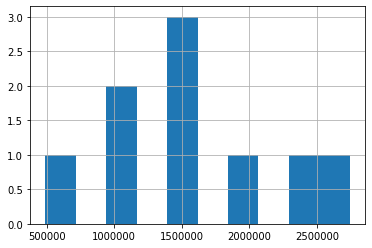

In [210]:
# do histogram to see how prices vary and find the reasons for that why is the prices fluctiating is it a noraml trend and from datasource get housing prices for whole miami and how has pricing been varying and compare those things
yearpivot['LIST PRICE'].hist()

In [214]:
miami.corr()

,BEDS,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,YEAR BUILT,year
BEDS,1.000000,0.237567,0.860435,0.431124,0.579720,0.284588,0.562127,0.112679,0.143586
EST TAXES,0.237567,1.000000,0.274906,0.196387,0.372724,0.389784,0.283555,0.111718,0.044277
FBATHS,0.860435,0.274906,1.000000,0.444891,0.677315,0.297777,0.660731,0.252276,0.163177
HBATHS,0.431124,0.196387,0.444891,1.000000,0.461245,0.189114,0.457031,0.293628,0.114637
LIST PRICE,0.579720,0.372724,0.677315,0.461245,1.000000,0.412077,0.995167,0.286902,0.167909
LOT SIZE,0.284588,0.389784,0.297777,0.189114,0.412077,1.000000,0.705195,0.063643,0.039954
SOLD PRICE,0.562127,0.283555,0.660731,0.457031,0.995167,0.705195,1.000000,0.288232,0.159662
YEAR BUILT,0.112679,0.111718,0.252276,0.293628,0.286902,0.063643,0.288232,1.000000,0.172018
year,0.143586,0.044277,0.163177,0.114637,0.167909,0.039954,0.159662,0.172018,1.000000


In [236]:
miami_final=pd.read_excel('Miami_final.xlsx')
miami_final=miami_final.drop(['Unnamed: 0'],axis=1)

In [237]:
miami_final.head()

,ADDRESS,latitudes,longitude,BEDS,CITY,CONST,CONTRACT,COUNTY,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,SUBD INFO,YEAR BUILT,ZIP CODE
0,5980 N Bay Rd,25.842269,-80.131355,6,Miami Beach,Concrete Block Construction,2019-09-18,Miami-Dade County,188036,9,2,32500000,43615.0,NaN,LA GORCE GOLF SUB,2015,33140
1,5004 N Bay Rd,25.826125,-80.133161,8,Miami Beach,"Elevated Construction, New Construction",2018-12-03,Miami-Dade County,256084,9,1,26500000,21517.0,NaN,LA GORCE GOLF SUB,2016,33140
2,5565/5589 Pine Tree Dr,25.834123,-80.123878,10,Miami Beach,Cbs Construction,2018-06-30,Miami-Dade County,153260,13,1,23990000,83548.0,NaN,BEACH VIEW SUB,1925,33140
3,100 La Gorce Circle,25.847262,-80.126620,7,Miami Beach,Cbs Construction,2018-11-09,Miami-Dade County,281368,9,1,22500000,77748.0,NaN,LA GORCE ISLAND,1952,33141
4,6385 Pinetree Drive Cir,25.845853,-80.126169,9,Miami Beach,Cbs Construction,2018-02-22,Miami-Dade County,284598,11,2,22500000,43763.0,NaN,BEACH VIEW ADDITION,1937,33141


In [238]:
miami_final.dtypes

ADDRESS               object
latitudes            float64
longitude            float64
BEDS                   int64
CITY                  object
CONST                 object
CONTRACT      datetime64[ns]
COUNTY                object
EST TAXES              int64
FBATHS                 int64
HBATHS                 int64
LIST PRICE             int64
LOT SIZE             float64
SOLD PRICE           float64
SUBD INFO             object
YEAR BUILT             int64
ZIP CODE              object
dtype: object

In [243]:
miami_final[['latitudes','longitude','LIST PRICE']]

,latitudes,longitude,LIST PRICE
0,25.842269,-80.131355,32500000
1,25.826125,-80.133161,26500000
2,25.834123,-80.123878,23990000
3,25.847262,-80.126620,22500000
4,25.845853,-80.126169,22500000
5,25.814632,-80.185615,20000000
6,25.850376,-80.124851,19950000
7,25.815418,-80.184767,14500000
8,25.822777,-80.124944,13750000
9,25.820894,-80.183183,13400000


In [252]:
miami_final['ZIP CODE'].unique()

array([33140, 33141, 33137, 33138, 33142, 33139, 33183, '33137-341',
       33179, 33109, '33109-75', 33149, 33129, 33133, 33130, 33145, 0,
       33131, 33156, 33184, 33127, 33136, 33132, 33128, 33169, 33168,
       33063], dtype=object)

In [260]:
elevation=pd.read_csv('elevation data.txt',sep='\t', header=None)


In [261]:
elevation.head()

,0,1,2,3,4,5
0,type,latitude,longitude,altitude (ft),eos,name
1,T,25.842269000,-80.131355000,0.3,NaN,latlong - Sheet1
2,T,25.826125000,-80.133161000,0.3,NaN,NaN
3,T,25.834123000,-80.123878000,4.0,NaN,NaN
4,T,25.847262000,-80.126620000,1.4,NaN,NaN


In [270]:
elevation.to_excel('elevation data.xlsx')